In [1]:
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import glob
import cv2
import imageio.v3 as iio
import random
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
class CNN:
    def __init__(self,path):
        self.path=path
    def list_filenames(self):
        files=glob.glob(f'{self.path}/*/*')
        return files
    def array_hist(self,files):
        img_array=[iio.imread(uri=i, mode="L") for i in files]
        class_n=[str(i).split('/')[-2].split('-')[1] for i in files]
        length = len(class_n)
        shuffled_indices = random.sample(range(length), length)
        class_n = [class_n[i] for i in shuffled_indices]
        img_array = [img_array[i] for i in shuffled_indices]
        return class_n,img_array
            
            
        

In [3]:
image_cls=CNN('/Users/Jishnu/Cropped')
files=image_cls.list_filenames()
class_n,img_array=image_cls.array_hist(files)

In [4]:
train_data=np.expand_dims(np.array(img_array), -1)

In [5]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
class_n=label_encoder.fit_transform(class_n) 

# StudentID-916467530

In [6]:
batch_size = 16
nb_classes =4
nb_epochs = 30
from tensorflow.keras import models
def model(i):
    model = models.Sequential()
    model.add(layers.Conv2D(8, (i, i), activation='relu', input_shape=(100, 100, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    HISTORY=model.fit(train_data, class_n, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_split=0.2)
    plt.plot(HISTORY.history['accuracy'], label='Training accuracy')
    plt.plot(HISTORY.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('EPOCHS')
    plt.ylabel('TRAINING AND VALIDATION ACCURACIES')
    plt.legend()
    plt.show()

Epoch 1/30
42/42 [==============================] - 1s 11ms/step - loss: 127.6481 - accuracy: 0.2868 - val_loss: 1.3829 - val_accuracy: 0.3576
Epoch 2/30
42/42 [==============================] - 0s 9ms/step - loss: 1.3843 - accuracy: 0.3111 - val_loss: 1.3813 - val_accuracy: 0.3576
Epoch 3/30
42/42 [==============================] - 0s 9ms/step - loss: 1.3829 - accuracy: 0.3111 - val_loss: 1.3802 - val_accuracy: 0.3576
Epoch 4/30
42/42 [==============================] - 0s 9ms/step - loss: 1.3814 - accuracy: 0.3111 - val_loss: 1.3785 - val_accuracy: 0.3576
Epoch 5/30
42/42 [==============================] - 0s 9ms/step - loss: 1.3800 - accuracy: 0.3111 - val_loss: 1.3771 - val_accuracy: 0.3576
Epoch 6/30
42/42 [==============================] - 0s 11ms/step - loss: 1.3788 - accuracy: 0.3111 - val_loss: 1.3758 - val_accuracy: 0.3576
Epoch 7/30
42/42 [==============================] - 1s 10ms/step - loss: 1.3779 - accuracy: 0.3111 - val_loss: 1.3753 - val_accuracy: 0.3576
Epoch 8/30
42/4

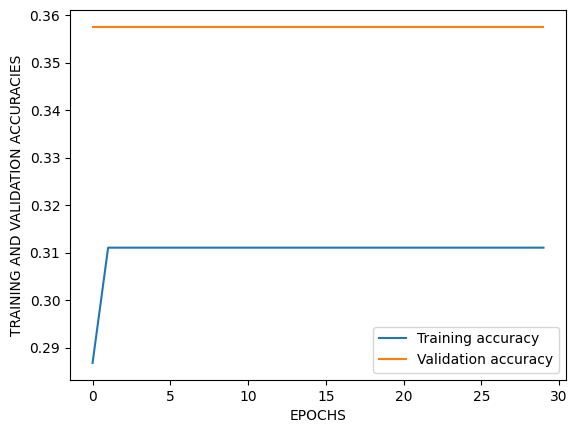

In [7]:
model(3)

Epoch 1/30
42/42 [==============================] - 1s 25ms/step - loss: 12.6449 - accuracy: 0.2534 - val_loss: 1.3851 - val_accuracy: 0.1879
Epoch 2/30
42/42 [==============================] - 1s 25ms/step - loss: 1.3846 - accuracy: 0.2716 - val_loss: 1.3838 - val_accuracy: 0.1879
Epoch 3/30
42/42 [==============================] - 1s 28ms/step - loss: 1.3830 - accuracy: 0.2974 - val_loss: 1.3819 - val_accuracy: 0.3576
Epoch 4/30
42/42 [==============================] - 1s 26ms/step - loss: 1.3812 - accuracy: 0.3111 - val_loss: 1.3803 - val_accuracy: 0.3576
Epoch 5/30
42/42 [==============================] - 1s 30ms/step - loss: 1.3798 - accuracy: 0.3111 - val_loss: 1.3788 - val_accuracy: 0.3576
Epoch 6/30
42/42 [==============================] - 2s 36ms/step - loss: 1.3785 - accuracy: 0.3111 - val_loss: 1.3771 - val_accuracy: 0.3576
Epoch 7/30
42/42 [==============================] - 1s 27ms/step - loss: 1.3774 - accuracy: 0.3111 - val_loss: 1.3761 - val_accuracy: 0.3576
Epoch 8/30
4

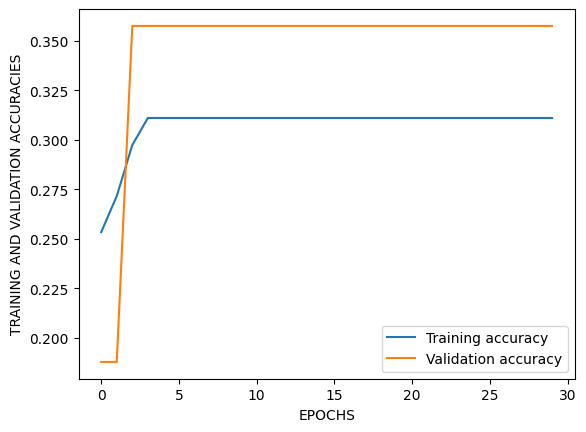

In [8]:
model(5)

Epoch 1/30
42/42 [==============================] - 2s 36ms/step - loss: 13.2280 - accuracy: 0.2185 - val_loss: 1.3858 - val_accuracy: 0.1879
Epoch 2/30
42/42 [==============================] - 2s 36ms/step - loss: 1.3847 - accuracy: 0.2974 - val_loss: 1.3834 - val_accuracy: 0.3576
Epoch 3/30
42/42 [==============================] - 1s 32ms/step - loss: 1.3829 - accuracy: 0.3111 - val_loss: 1.3816 - val_accuracy: 0.3576
Epoch 4/30
42/42 [==============================] - 1s 36ms/step - loss: 1.3813 - accuracy: 0.3111 - val_loss: 1.3796 - val_accuracy: 0.3576
Epoch 5/30
42/42 [==============================] - 1s 33ms/step - loss: 1.3798 - accuracy: 0.3111 - val_loss: 1.3776 - val_accuracy: 0.3576
Epoch 6/30
42/42 [==============================] - 2s 38ms/step - loss: 1.3782 - accuracy: 0.3111 - val_loss: 1.3762 - val_accuracy: 0.3576
Epoch 7/30
42/42 [==============================] - 2s 40ms/step - loss: 1.3771 - accuracy: 0.3111 - val_loss: 1.3755 - val_accuracy: 0.3576
Epoch 8/30
4

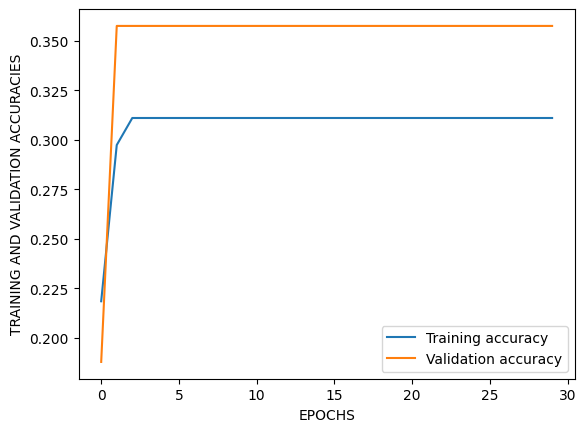

In [9]:
model(7)

# Model 2 performs well(5x5), as no overfitting occurs as the number of epochs increases. For Model 1 and model 3 both underfitting and overfitting occurs
# Model2 perfroms better than other two models

In [10]:
class Association_Rules:
    def __init__(self,path):
        self.path=path
    def data(self):
        df = pd.read_csv(self.path)
        df = df.fillna('0')
        
        print(df)
        te = TransactionEncoder()
        df = te.fit(df.values).transform(df.values)
        return df, te
    def Ass_rules(self,df,msv,mct):
        frequent_itemsets = fpgrowth(df, min_support=msv, use_colnames=True)
        associa_rules,shape=association_rules(frequent_itemsets, metric="confidence", min_threshold=mct),association_rules(frequent_itemsets, metric="confidence", min_threshold=mct).shape[0]
        return associa_rules, len(associa_rules.index),shape
        
        
        

        
    

In [11]:
ar=Association_Rules('/Users/Jishnu/Grocery_Items_55.csv')
df,te=ar.data()
df=pd.DataFrame(df,columns=te.columns_)
df = df.drop('0', axis=1)

rules,s,e=ar.Ass_rules(df,0.01,0.1)

                          0                  1  2  3  4  5  6  7  8  9 10
0                   mustard               soda  0  0  0  0  0  0  0  0  0
1           root vegetables      sweet spreads  0  0  0  0  0  0  0  0  0
2                      soda             spices  0  0  0  0  0  0  0  0  0
3                   sausage             yogurt  0  0  0  0  0  0  0  0  0
4                   chicken             onions  0  0  0  0  0  0  0  0  0
...                     ...                ... .. .. .. .. .. .. .. .. ..
7995  fruit/vegetable juice  seasonal products  0  0  0  0  0  0  0  0  0
7996                 pastry          chocolate  0  0  0  0  0  0  0  0  0
7997             whole milk         rolls/buns  0  0  0  0  0  0  0  0  0
7998             whole milk          margarine  0  0  0  0  0  0  0  0  0
7999       other vegetables            napkins  0  0  0  0  0  0  0  0  0

[8000 rows x 11 columns]


In [12]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(soda),(whole milk),0.096250,0.156125,0.010250,0.106494,0.682104,-0.004777,0.944453,-0.340233
1,(yogurt),(whole milk),0.087250,0.156125,0.010625,0.121777,0.779994,-0.002997,0.960889,-0.236072
2,(other vegetables),(whole milk),0.120875,0.156125,0.014750,0.122027,0.781597,-0.004122,0.961163,-0.241189
3,(rolls/buns),(whole milk),0.110125,0.156125,0.013625,0.123723,0.792461,-0.003568,0.963023,-0.227382


In [13]:
print(f'number of rules---{e}')

number of rules---4


In [14]:
val=pd.DataFrame(np.ones((3, 4)),columns=[0.001, 0.005, 0.01, 0.05],index=[0.05, 0.075, 0.1], dtype=float)
val

,0.001,0.005,0.010,0.050
0.050,1.0,1.0,1.0,1.0
0.075,1.0,1.0,1.0,1.0
0.100,1.0,1.0,1.0,1.0


In [15]:
i=0
while i<3:
    j=0
    while j<4:
        mct=list(val.index)[i]
        msv=list(val.columns)[j]
        print(f'msv{msv},mct{mct}')
        rules,s,e=ar.Ass_rules(df,msv,mct)
        if msv==0.005:
            r=rules
        print('rulescount----',s)
        val.iloc[i,j]=s
        j+=1
    i+=1
        

msv0.001,mct0.05
rulescount---- 542
msv0.005,mct0.05
rulescount---- 61
msv0.01,mct0.05
rulescount---- 8
msv0.05,mct0.05
rulescount---- 0
msv0.001,mct0.075
rulescount---- 295
msv0.005,mct0.075
rulescount---- 42
msv0.01,mct0.075
rulescount---- 6
msv0.05,mct0.075
rulescount---- 0
msv0.001,mct0.1
rulescount---- 155
msv0.005,mct0.1
rulescount---- 18
msv0.01,mct0.1
rulescount---- 4
msv0.05,mct0.1
rulescount---- 0


In [16]:
val

,0.001,0.005,0.010,0.050
0.050,542.0,61.0,8.0,0.0
0.075,295.0,42.0,6.0,0.0
0.100,155.0,18.0,4.0,0.0


[Text(0.5, 23.52222222222222, 'msv'), Text(50.722222222222214, 0.5, 'mct')]

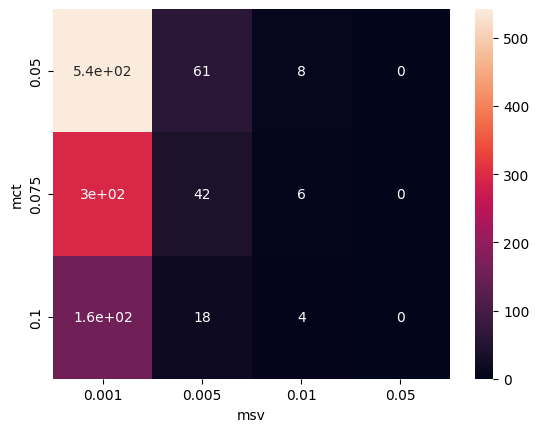

In [17]:
ax=sns.heatmap(val, annot=True)
ax.set(xlabel="msv", ylabel="mct")

r

In [19]:
r=pd.DataFrame(ar.Ass_rules(df,0.005,0.001)[0])

In [20]:
max(r['confidence'])

0.16024340770791076

In [25]:
r[r['confidence']==max(r['confidence'])]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
25,(sausage),(whole milk),0.061625,0.156125,0.009875,0.160243,1.026379,0.000254,1.004904,0.027389


# References

# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
# https://datagen.tech/guides/image-classification/image-classification-using-cnn/
# https://keras.io/examples/vision/mnist_convnet/
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://www.geeksforgeeks.org/image-classifier-using-cnn/